In [1]:
# import library

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# read data file

df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# general info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 1. Data Cleaning

Dataset insurance.csv terdiri dari 1338 baris dan 7 kolom. Sebelum masuk pada tahap pengolahan data, akan dilakukan pembersihan dataset terlebih dahulu. Pembersihan dataset yang akan dilakukan meliputi missing value data, duplicates data, dan inconsistent data.

### 1.1. Missing value checking

In [4]:
# missing value check

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tidak terdapat missing value pada dataset.

### 1.2. Duplicates data checking

In [5]:
# duplicates check

df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Terdapat data duplikat pada index data 195 dan 581. Penanganan yang dilakukan pada data duplikat adalah dengan menyimpan index data ke-195 dan menghapus index data ke-581.

In [6]:
# keep first value

df.drop_duplicates(keep = 'first', inplace = True)

In [7]:
# re-check setelah drop data

df.duplicated().sum()

0

Tidak ada lagi data duplikat pada dataset.

### 1.3. Inconsistent data checking

In [8]:
# unique value check pada pada colomn dengan tipe data object
pd.concat([df['sex'], df['smoker'], df['region']]).unique()

array(['female', 'male', 'yes', 'no', 'southwest', 'southeast',
       'northwest', 'northeast'], dtype=object)

Tidak terdapat inconsistent data pada dataset.

### 1.4. Cleaned data

In [9]:
# cleaned dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Setelah dilakukan pembersihan, dataset telah siap untuk diolah. Cleaned data terdiri dari 1337 baris dan 7 kolom.

## 2. Analisis Statistik Deskriptif

In [10]:
# general statistik deskripsi numerikal

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [11]:
# general statistik deskripsi kategorikal

df.describe(include=['O']).T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


### 2.1. Rata-rata umur pengguna asuransi

In [12]:
# rata-rata umur pengguna asuransi

mean_age = df['age'].mean()
print(f"Rata-rata umur pengguna asuransi adalah {mean_age:.2f} tahun")

Rata-rata umur pengguna asuransi adalah 39.22 tahun


### 2.2. Rata-rata BMI perempuan dan laki-laki

In [13]:
# rata-rata BMI groupby sex

mean_bmi_sex = df.groupby(['sex'])[['bmi']].mean()
round(mean_bmi_sex, 2)

,bmi
sex,
female,30.38
male,30.94


### 2.3. Rata-rata BMI perokok dan non perokok

In [14]:
# rata-rata BMI groupby smoker

mean_bmi_smoker = df.groupby(['smoker'])[['bmi']].mean()
round(mean_bmi_smoker, 2)

,bmi
smoker,
no,30.65
yes,30.71


### 2.4. Rata-rata tagihan perokok dan non perokok

In [15]:
# rata-rata charges groupby smoker

mean_charges_smoker = df.groupby(['smoker'])[['charges']].mean()
round(mean_charges_smoker, 2)

,charges
smoker,
no,8440.66
yes,32050.23


### 2.5. Variansi & standar deviasi tagihan perokok dan non perokok

In [16]:
# data tagihan perokok

charges_smoker = df[df["smoker"]=="yes"][["charges"]]

# varians tagihan perokok

var_charges_smoker = np.var(charges_smoker, ddof = 1)
print(f"Variansi tagihan perokok adalah {var_charges_smoker[0]:.2f} USD\u00b2")

#standar deviasi tagihan perokok

std_charges_smoker = np.std(charges_smoker, ddof = 1)
print(f"Standar deviasi tagihan perokok adalah {std_charges_smoker[0]:.2f} USD")

Variansi tagihan perokok adalah 133207311.21 USD²
Standar deviasi tagihan perokok adalah 11541.55 USD


In [17]:
# data tagihan non perokok

charges_non = df[df["smoker"]=="no"][["charges"]]

# varians tagihan non perokok

var_charges_non = np.var(charges_non, ddof = 1)
print(f"Variansi tagihan non perokok adalah {var_charges_non[0]:.2f} USD\u00b2")

#standar deviasi tagihan perokok

std_charges_non = np.std(charges_non, ddof = 1)
print(f"Standar deviasi tagihan non perokok adalah {std_charges_non[0]:.2f} USD")

Variansi tagihan non perokok adalah 35915734.97 USD²
Standar deviasi tagihan non perokok adalah 5992.97 USD


## 3. Analisis Variabel Diskrit

### 3.1. Proporsi banyak pengguna asuransi di tiap regional

In [18]:
# pengguna asuransi tiap regional

user_region = df[['region']].value_counts()
user_region

region   
southeast    364
southwest    325
northeast    324
northwest    324
dtype: int64

### 3.2. Proporsi perokok dan non perokok

In [19]:
# pengguna asuransi perokok & non perokok

user_groupby_smoker = df[['smoker']].value_counts()
user_groupby_smoker

smoker
no        1063
yes        274
dtype: int64

### 3.3. Peluang seseorang adalah perempuan bila diketahui sebagai perokok

In [20]:
# jumlah pengguna asuransi groupby sex & smoker

sex_smoker = df.groupby(['sex'])[['smoker']].value_counts()
sex_smoker

sex     smoker
female  no        547
        yes       115
male    no        516
        yes       159
dtype: int64

In [21]:
# total female user
n_female = sex_smoker[0:2].sum()

# total female user & smoker
n_female_smoker = sex_smoker[1]

# probability female given smoker
prob_female_given_smoker = n_female_smoker / n_female * 100
print(f"Peluang seseorang adalah perempuan bila diketahui sebagai perokok adalah {prob_female_given_smoker:.2f}%")

Peluang seseorang adalah perempuan bila diketahui sebagai perokok adalah 17.37%


### 3.4. Peluang seseorang adalah laki-laki bila diketahui sebagai perokok

In [22]:
# total female user
n_male = sex_smoker[2:].sum()

# total female user & smoker
n_male_smoker = sex_smoker[-1]

# probability female given smoker
prob_male_given_smoker = n_male_smoker / n_male * 100
print(f"Peluang seseorang adalah laki-laki bila diketahui sebagai perokok adalah {prob_male_given_smoker:.2f}%")

Peluang seseorang adalah laki-laki bila diketahui sebagai perokok adalah 23.56%


### 3.5. Distribusi peluang tagihan di tiap regional

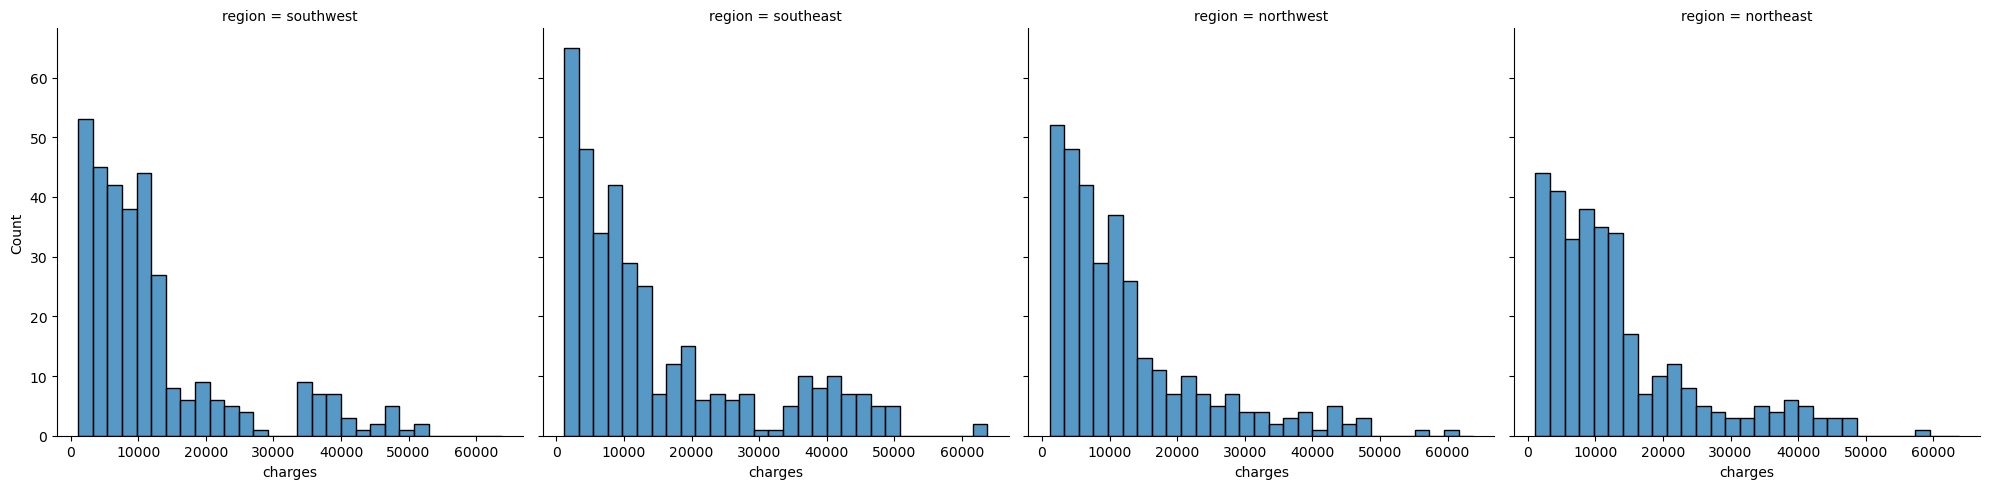

In [23]:
sns.displot(df, x='charges', col='region')

## 4. Analisis Varibel Kontinyu

1. Mana yang lebih mungkin terjadi
    
    a. Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k
    
    atau
    
    b. Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k

In [24]:
# jumlah user dengan charges > 16.7k
n_charges_hi = df[(df['charges'] > 16700)].value_counts().sum()

# jumlah user dengan BMI > 25 & charges > 16.7k
n_bmi_hi_charges_hi = df[(df['bmi'] > 25) & (df['charges'] > 16700)].value_counts().sum()

# probability user dengan BMI > 25 mendapatkan charges > 16.7k
prob_bmi_hi_charges_hi = n_bmi_hi_charges_hi / n_charges_hi * 100

print(f"Peluang seseorang dengan BMI > 25 mendapatkan tagihan > 16.7k adalah {prob_bmi_hi_charges_hi:.2f}%")

Peluang seseorang dengan BMI > 25 mendapatkan tagihan > 16.7k adalah 84.73%


In [25]:
# jumlah user dengan charges > 16.7k
n_charges_hi = df[(df['charges'] > 16700)].value_counts().sum()

# jumlah user dengan BMI < 25 & charges > 16.7k
n_bmi_low_charges_hi = df[(df['bmi'] < 25) & (df['charges'] > 16700)].value_counts().sum()

# probability user dengan BMI < 25 mendapatkan charges > 16.7k
prob_bmi_low_charges_hi = n_bmi_low_charges_hi / n_charges_hi * 100

print(f"Peluang seseorang dengan BMI < 25 mendapatkan tagihan > 16.7k adalah {prob_bmi_low_charges_hi:.2f}%")

Peluang seseorang dengan BMI < 25 mendapatkan tagihan > 16.7k adalah 15.27%


Lebih mungkin terjadi seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k, dengan probabilitas __84.73%__.

Dengan kata lain, __dari 100 orang yang mendapatkan tagihan kesehatan di atas 16.7k__, __85 orang di antaranya memiliki BMI di atas 25__.

2. Mana yang lebih mungkin terjadi
    
    a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
    
    atau
    
    b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [26]:
# jumlah user dengan BMI > 25 & charges > 16.7k
n_bmi_hi_charges_hi = df[(df['bmi'] > 25) & (df['charges'] > 16700)].value_counts().sum()

# jumlah user perokok dengan BMI > 25 & charges > 16.7k
n_smoker_bmi_hi_charges_hi = df[(df['smoker'] == 'yes') & (df['bmi'] > 25) & (df['charges'] > 16700)].value_counts().sum()

# probability user perokok dengan BMI > 25 mendapatkan charges > 16.7k
prob_smoker_bmi_hi_charges_hi = n_smoker_bmi_hi_charges_hi / n_bmi_hi_charges_hi * 100

print(f"Peluang seseorang perokok dengan BMI > 25 mendapatkan tagihan > 16.7k adalah {prob_smoker_bmi_hi_charges_hi:.2f}%")

Peluang seseorang perokok dengan BMI > 25 mendapatkan tagihan > 16.7k adalah 75.97%


In [27]:
# jumlah user dengan BMI > 25 & charges > 16.7k
n_bmi_hi_charges_hi = df[(df['bmi'] > 25) & (df['charges'] > 16700)].value_counts().sum()

# jumlah user non perokok dengan BMI > 25 & charges > 16.7k
n_non_bmi_hi_charges_hi = df[(df['smoker'] == 'no') & (df['bmi'] > 25) & (df['charges'] > 16700)].value_counts().sum()

# probability user non perokok dengan BMI > 25 mendapatkan charges > 16.7k
prob_non_bmi_hi_charges_hi = n_non_bmi_hi_charges_hi / n_bmi_hi_charges_hi * 100

print(f"Peluang seseorang non perokok dengan BMI > 25 mendapatkan tagihan > 16.7k adalah {prob_non_bmi_hi_charges_hi:.2f}%")

Peluang seseorang non perokok dengan BMI > 25 mendapatkan tagihan > 16.7k adalah 24.03%


Lebih mungkin terjadi seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k, dengan probabilitas __75.97%__.

Dengan kata lain, __dari 100 orang dengan BMI di atas 25 dan mendapatkan tagihan kesehatan di atas 16.7k__, __76 orang di antaranya adalah perokok__.

## 5. Analisis Korelasi Variabel

### 5.1. Korelasi tagihan kesehatan dengan umur, BMI, dan tanggungan anak.

In [28]:
df_corr = df[['charges', 'age', 'bmi', 'children']].corr()
df_corr

,charges,age,bmi,children
charges,1.000000,0.298308,0.198401,0.067389
age,0.298308,1.000000,0.109344,0.041536
bmi,0.198401,0.109344,1.000000,0.012755
children,0.067389,0.041536,0.012755,1.000000


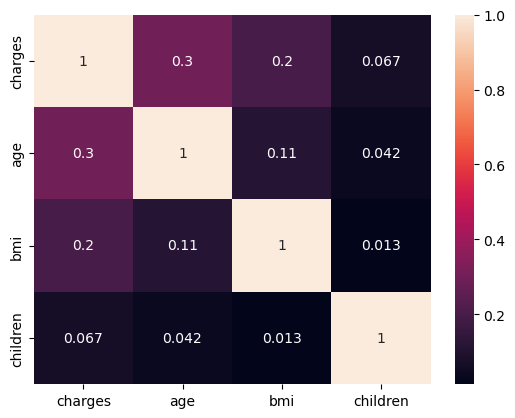

In [29]:
sns.heatmap(df_corr, annot = True)
plt.show()

## 6. Pengujian Hipotesis

### 6.1. Tagihan kesehatan perokok lebih tinggi dari tagihan kesehatan non perokok

#### 1. Hipotesis dan significance level

Tagihan kesehatan perokok lebih tinggi dari tagihan kesehatan non perokok.

H0 : tagihan kesehatan perokok ($\mu$1) $\leq$ tagihan kesehatan non perokok ($\mu$2)
<br>H1 : tagihan kesehatan perokok ($\mu$1) $>$ tagihan kesehatan non perokok ($\mu$2)
<br>$ \alpha $ : 5%


In [30]:
alpha = 0.05

#### 2. Statistik uji

Uji statistik yang digunakan adalah t-test pada 2 sampel. Sampel 1 adalah tagihan kesehatan perokok, dan sampel 2 adalah tagihan kesehatan non perokok.

#### 3. Aturan keputusan

- Alpha = 0.05
- Uji pihak kanan (dalam H1 mengandung tanda $>$)

#### 4. Hitung statistik uji

In [31]:
# sample tagihan perokok
n_charges_smoker = df[df['smoker'] == 'yes']['charges'].tolist()

# sample tagihan non perokok
n_charges_non = df[df['smoker'] == 'no']['charges'].tolist()

In [32]:
# varians perokok dan non perokok
np.var(n_charges_smoker), np.var(n_charges_non)

(132721153.13625307, 35881947.82391963)

In [33]:
from scipy.stats import ttest_ind

# menghitung statistik uji dan p-value
stat, p = ttest_ind(a = n_charges_smoker, b = n_charges_non, equal_var = False, alternative = 'greater') # equal_var = False karena varians kedua populasi berbeda

# interpretasi hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = 32.7423, p-value = 0.0000


#### 5. Pengambilan keputusan

In [34]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are different (Tolak H0)


Dari pengujian hipotesis diatas, dapat disimpulkan bahwa tagihan kesehatan perokok lebih besar dari tagihan kesehatan non perokok.